In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [3]:
data = pd.read_csv('AMZN.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5930,2020-12-07,3156.479980,3180.760010,3141.689941,3158.000000,3158.000000,2751300
5931,2020-12-08,3158.899902,3184.129883,3120.020020,3177.290039,3177.290039,3286300
5932,2020-12-09,3167.889893,3174.429932,3088.000000,3104.199951,3104.199951,4100800
5933,2020-12-10,3088.989990,3142.100098,3076.000000,3101.489990,3101.489990,3030200
5934,2020-12-11,3096.659912,3118.669922,3072.820068,3116.419922,3116.419922,3062300


In [4]:
# Untill 1-1-2020 Training Data --- 2020 Testing data

In [73]:
data_training = data[data['Date']<'2020-01-01'].copy()

In [74]:
data_training.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5690,2019-12-24,1793.810059,1795.569946,1787.579956,1789.209961,1789.209961,881300
5691,2019-12-26,1801.010010,1870.459961,1799.500000,1868.770020,1868.770020,6005400
5692,2019-12-27,1882.920044,1901.400024,1866.010010,1869.800049,1869.800049,6186600
5693,2019-12-30,1874.000000,1884.000000,1840.619995,1846.890015,1846.890015,3674700
5694,2019-12-31,1842.000000,1853.260010,1832.229980,1847.839966,1847.839966,2506500


In [76]:
data_test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5930,2020-12-07,3156.479980,3180.760010,3141.689941,3158.000000,3158.000000,2751300
5931,2020-12-08,3158.899902,3184.129883,3120.020020,3177.290039,3177.290039,3286300
5932,2020-12-09,3167.889893,3174.429932,3088.000000,3104.199951,3104.199951,4100800
5933,2020-12-10,3088.989990,3142.100098,3076.000000,3101.489990,3101.489990,3030200
5934,2020-12-11,3096.659912,3118.669922,3072.820068,3116.419922,3116.419922,3062300


In [77]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)
data_training.tail()

,Open,High,Low,Close,Volume
5690,1793.810059,1795.569946,1787.579956,1789.209961,881300
5691,1801.010010,1870.459961,1799.500000,1868.770020,6005400
5692,1882.920044,1901.400024,1866.010010,1869.800049,6186600
5693,1874.000000,1884.000000,1840.619995,1846.890015,3674700
5694,1842.000000,1853.260010,1832.229980,1847.839966,2506500


In [78]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

In [80]:
data_training[0]

In [81]:
data_training.shape

(5695, 5)

In [19]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [21]:
len(y_train)

5635

In [22]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(5635, 60, 5)

In [24]:
X_train[0].shape

(60, 5)

In [203]:
## LSTM

model = Sequential()

model.add(LSTM(units= 96, return_sequences= True, input_shape= (X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units= 96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= 96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= 96))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [204]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 96)            39168     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 96)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 96)            74112     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 96)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 96)            74112     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 96)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 96)               

In [175]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs=75, batch_size=32)

Epoch 1/75
177/177 [==============================] - 11s 64ms/step - loss: 5.6772e-04
Epoch 2/75
177/177 [==============================] - 12s 66ms/step - loss: 5.5336e-04
Epoch 3/75
177/177 [==============================] - 12s 66ms/step - loss: 5.2278e-04 0s - loss
Epoch 4/75
177/177 [==============================] - 12s 65ms/step - loss: 5.7398e-04
Epoch 5/75
177/177 [==============================] - 11s 63ms/step - loss: 5.9168e-04
Epoch 6/75
177/177 [==============================] - 11s 65ms/step - loss: 4.7426e-04
Epoch 7/75
177/177 [==============================] - 11s 64ms/step - loss: 5.5715e-04
Epoch 8/75
177/177 [==============================] - 12s 65ms/step - loss: 5.7387e-04
Epoch 9/75
177/177 [==============================] - 11s 64ms/step - loss: 5.6213e-04
Epoch 10/75
177/177 [==============================] - 12s 66ms/step - loss: 4.9012e-04
Epoch 11/75
177/177 [==============================] - 12s 67ms/step - loss: 5.2702e-04
Epoch 12/75
177/177 [==========

In [176]:
model.save_weights('model.h5')

In [177]:
data_test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5930,2020-12-07,3156.479980,3180.760010,3141.689941,3158.000000,3158.000000,2751300
5931,2020-12-08,3158.899902,3184.129883,3120.020020,3177.290039,3177.290039,3286300
5932,2020-12-09,3167.889893,3174.429932,3088.000000,3104.199951,3104.199951,4100800
5933,2020-12-10,3088.989990,3142.100098,3076.000000,3101.489990,3101.489990,3030200
5934,2020-12-11,3096.659912,3118.669922,3072.820068,3116.419922,3116.419922,3062300


In [184]:
# get last 60 days and append them to test_data

last_days = data[data['Date']<'2020-01-01'].copy()
last_days  = last_days.tail(60)
last_days  = last_days.drop(['Date', 'Adj Close'], axis = 1)

last_days.shape, last_days.tail()

((60, 5),
              Open         High          Low        Close   Volume
 5690  1793.810059  1795.569946  1787.579956  1789.209961   881300
 5691  1801.010010  1870.459961  1799.500000  1868.770020  6005400
 5692  1882.920044  1901.400024  1866.010010  1869.800049  6186600
 5693  1874.000000  1884.000000  1840.619995  1846.890015  3674700
 5694  1842.000000  1853.260010  1832.229980  1847.839966  2506500)

In [185]:
type(last_days)

pandas.core.frame.DataFrame

In [186]:
df = last_days.append(data_test)
# df = data_test.copy()
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head(), df.tail()

(             Open         High          Low        Close   Volume
 5635  1731.630005  1747.829956  1723.699951  1732.660034  2154700
 5636  1722.489990  1727.000000  1705.000000  1705.510010  2542000
 5637  1719.609985  1729.949951  1714.359985  1721.989990  2043500
 5638  1725.239990  1738.290039  1713.750000  1720.260010  2575200
 5639  1742.920044  1745.449951  1729.859985  1731.920044  3255000,
              Open         High          Low        Close   Volume
 5930  3156.479980  3180.760010  3141.689941  3158.000000  2751300
 5931  3158.899902  3184.129883  3120.020020  3177.290039  3286300
 5932  3167.889893  3174.429932  3088.000000  3104.199951  4100800
 5933  3088.989990  3142.100098  3076.000000  3101.489990  3030200
 5934  3096.659912  3118.669922  3072.820068  3116.419922  3062300)

In [187]:
inputs = scaler.transform(df)
inputs.shape

(300, 5)

In [188]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((240, 60, 5), (240,))

In [189]:
y_pred = model.predict(X_test)
y_pred

array([[ 6.98641002e-01],
       [ 7.55995274e-01],
       [ 7.73121178e-01],
       [ 7.79173553e-01],
       [ 8.21714997e-01],
       [ 8.43510807e-01],
       [ 8.69865358e-01],
       [ 8.68663967e-01],
       [ 8.61844122e-01],
       [ 8.33827615e-01],
       [ 8.07867944e-01],
       [ 8.12033474e-01],
       [ 7.94177771e-01],
       [ 7.94624150e-01],
       [ 8.43193054e-01],
       [ 8.67273629e-01],
       [ 8.54724824e-01],
       [ 8.22906852e-01],
       [ 7.87134349e-01],
       [ 7.90528178e-01],
       [ 7.67044008e-01],
       [ 8.20711553e-01],
       [ 7.67703176e-01],
       [ 1.34862995e+00],
       [ 6.36765778e-01],
       [ 1.53760123e+00],
       [ 5.38742185e-01],
       [ 1.22362781e+00],
       [ 5.98815382e-01],
       [ 6.87333167e-01],
       [ 1.10643744e+00],
       [ 2.48696625e-01],
       [ 2.36099744e+00],
       [ 1.21223956e-01],
       [ 2.81454730e+00],
       [ 1.17620863e-01],
       [ 2.03587508e+00],
       [ 1.12240516e-01],
       [ 1.6

In [190]:
np.array(y_pred, dtype='int')

array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 2],
       [ 0],
       [ 2],
       [ 0],
       [ 2],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],

In [191]:
scaler.scale_[0], scaler.scale_

(0.005394616318568702,
 array([5.39461632e-03, 5.73394417e-03, 5.84761091e-03, 6.08679629e-03,
        1.14349750e-07]))

In [192]:
scale = 1/scaler.scale_[0]
scale

185.36999500000024

In [197]:
# y_test = scaler.inverse_transform(y_test)
y_test *= scale
y_pred *= scale

diff = y_pred - y_test
np.array(diff, dtype='int')

array([[  -47,   -37,   -32, ..., -1340, -1261, -1269],
       [  -37,   -26,   -22, ..., -1330, -1251, -1258],
       [  -34,   -23,   -19, ..., -1327, -1248, -1255],
       ...,
       [ -295,  -284,  -280, ..., -1588, -1509, -1516],
       [ -288,  -278,  -273, ..., -1581, -1502, -1510],
       [ -194,  -184,  -179, ..., -1487, -1408, -1416]])

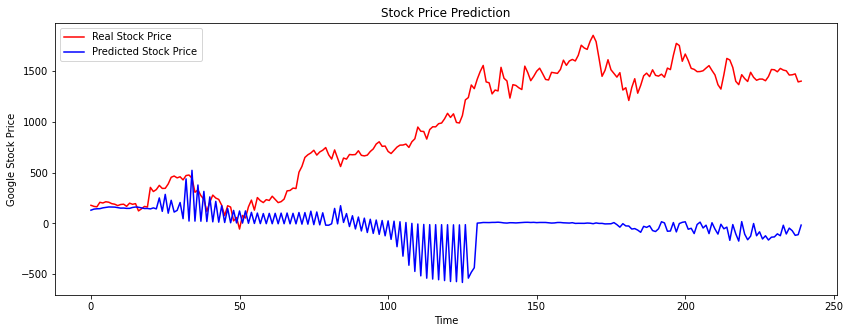

In [199]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()